<a href="https://colab.research.google.com/github/Annette-1/Ecuaciones_Diferenciales_Parciales/blob/main/Metodo_de__richardson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="color:blue;"></span>
## <span style="color:blue;">**Método implícito de Richardson**</span>

## Dado el ejercicio:

* Use el método de diferencias regresivos con $h = 0.1$, $k = 0.01$ para aproximar la solución de  
<span style="color:purple;">
$\frac{\partial u}{\partial t}(x,t) - \frac{\partial^2 u}{\partial x^2}(x,t) = 0, \quad 0 < x < 1, \quad 0 < t$</span>  

Sujeta a las condiciones:  

$u(0,t) = u(1,t) = 0, \quad 0 < t, \quad u(x,0) = \sin(\pi x), \quad 0 \leq x \leq 1\$



---
 Aplicando el metodo de Richardson (diferencias regresivas), probamos para:

 **$\alpha = 1$, $h = 0.1$, $k = 0.01$**

 Hallamos el valor de $λ$ que viene siendo la razón dadda por:

$\lambda = \frac{\alpha^2 k}{h^2} = \frac{(1)^2 (0.01)}{(0.1)^2} = 1$

Aplicando la fórmula de  diferencias regresivas:  
<span style="color:purple;">
$(1 + 2\lambda) u_{i,j} - \lambda u_{i+1,j} - \lambda u_{i-1,j} = u_{i,j-1}, \quad \text{con }$ </span>

con $i = 1,$ $j = 1$, obtenemos:
*  $3u_{11}$ - $u_{21}$ - $u_{01}$= $u_{10}$

 de esta manera obtemos las siaguientes ecuaciones

\begin{align*}
 3u_{21} - u_{31} - u_{11} &= u_{20}  \\
3u_{31} - u_{41} - u_{21} &= u_{30}
\end{align*}

\begin{align*}
3u_{41} - u_{51} - u_{31} &= u_{40} \\
3u_{51} - u_{61} - u_{41} &= u_{50} \\
3u_{61} - u_{71} - u_{51} &= u_{60}
\end{align*}

\begin{align*}
3u_{71} - u_{81} - u_{61} &= u_{70} \\
3u_{81} - u_{91} - u_{71} &= u_{80} \\
3u_{91} - u_{10,1} - u_{81} &= u_{90}
\end{align*}


Este sistema es equivalente a reescribirlo de la siguiente manera:
 de esta manera obtemos las siaguientes ecuaciones

\begin{align*}
3u_{11} - u_{21} - $u_{01}&= f(0.1)\\
 3u_{21} - u_{31} - u_{11} &= f(0.2)  \\
3u_{31} - u_{41} - u_{21} &= f(0.3)
\end{align*}

\begin{align*}
3u_{41} - u_{51} - u_{31} &= f(0.4) \\
3u_{51} - u_{61} - u_{41} &= f(0.5) \\
3u_{61} - u_{71} - u_{51} &= f(0.6)
\end{align*}

\begin{align*}
3u_{71} - u_{81} - u_{61} &= f(0.7) \\
3u_{81} - u_{91} - u_{71} &= f(0.8) \\
3u_{91} - u_{10,1} - u_{81} &= f(0.9)
\end{align*}


In [254]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap

%matplotlib inline


In [255]:
def f(x):
    return np.sin(np.pi*x) # funcion dada en el problema u(x,0)

In [256]:
A = sp.Matrix([[3,-1, 0, 0, 0, 0, 0, 0, 0],
              [-1, 3,-1, 0, 0, 0, 0, 0, 0],
              [0, -1, 3,-1, 0, 0, 0, 0, 0],
              [0, 0, -1, 3,-1, 0, 0, 0, 0],
              [0, 0, 0, -1, 3,-1, 0, 0, 0],
              [0, 0, 0, 0, -1, 3,-1, 0, 0],
              [0, 0, 0, 0, 0, -1, 3,-1, 0],
              [0, 0, 0, 0, 0, 0, -1, 3,-1],
              [0, 0, 0, 0, 0, 0, 0, -1, 3,]])

In [257]:
b = sp.Matrix([f(0.1), f(0.2), f(0.3), f(0.4), f(0.5), f(0.6), f(0.7), f(0.8), f(0.9)])
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

<span style="color:magenta;">**Ejercicio 1**: Codificar la matriz A de manera más simple.</span>

Importamos la *librería scipy.sparse.diags* que sirve para crear matrices dispersas (sparse) de forma mas eficiente, es decir, matrices con estructura tridiagonal o bandeadas.

In [258]:
from scipy.sparse import diags #esta libreria sirve para matrices tridiagonales

def crear_matriz_A_scipy(n=9):
    """Crea la matriz usando scipy (más eficiente para n grande)"""
    diagonales = [[3]*n, [-1]*(n-1), [-1]*(n-1)] #diagonal principal dada por -3
    A_sparse = diags(diagonales, [0, -1, 1], shape=(n, n)) # Estas son las subdiagonales por debajo y arriba de la diagonal principal
    return sp.Matrix(A_sparse.toarray())

A = crear_matriz_A_scipy(9) # crea la matriz de tamaño nxn
A

Matrix([
[ 3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[-1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0]])

<span style="color:magenta;">**Ejercicio 2**: Definir las entradas de b de manera más simple (quizás con un bucle).</span>

Crea una lista para el vector b que va desde $0.1-0.9$ que se va evaluando a traves de la funcion $f(x)$

In [259]:
b = sp.Matrix([f(i*0.1) for i in range(1, 10)]) # Para cada i en [1,2,3,4,5,6,7,8,9] calculamos i*0.1:
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [260]:
A.LUsolve(b)

Matrix([
[0.281465217775586],
[0.535378658951812],
[0.736885506787377],
[ 0.86626086703537],
[ 0.91084057802358],
[ 0.86626086703537],
[0.736885506787377],
[0.535378658951812],
[0.281465217775587]])

Esta función es solo de prueba. Se puede omitir

In [261]:
def richardson_1(A, b, j):
    b_1 = b
    for i in range(j+1):
        sol = A.LUsolve(b_1)
        b_1 = sol
        _ = None #Para que no imprima resultados parciales
    return b_1

In [262]:
richardson_1(A, b, 3)

Matrix([
[0.212692337894623],
[0.404564867841463],
[  0.5568357697548],
[0.654599706821597],
[0.688286863720354],
[0.654599706821597],
[  0.5568357697548],
[0.404564867841463],
[0.212692337894623]])

Definimos una funcion para Richardson (difrencias regresivas)

In [263]:
def richardson(A, b, j):
    S = []
    b_1 = b.copy()

    for i in range(j+1):
        S.append(np.array(b_1, dtype=float).reshape(-1))  # vector fila
        sol = A.LUsolve(b_1)
        b_1 = sol

    return np.array(S)   # matriz resultado

<span style="color:magenta;">**Ejercicio 4**: Graficar para un valor particular de t > 0 y comparar contra la gráfica de la solución exacta (quizás necesite calcularla).</span>

Para este ejercicio resolviedo la ecuación de calor tenemos que la solución excata es:
<span style="color:purple;">
$$
\frac{\partial u}{\partial t}(x,t) - \frac{\partial^2 u}{\partial x^2}(x,t) = 0, \quad 0 < x < 1, \quad 0 < t
$$</span>  
<span style="color:red;">
$$
u(x,t)=e^{-π^2 t}\sin(πx)
$$</span>

In [264]:
def solucion_exacta(x, t):
    """definimos una funcion con la Solución exacta de la ecuación del calor"""
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)

In [265]:
# Parámetros
t_valor = 0.1  # Valor de tiempo para comparar
iteraciones = 5  # Número de iteraciones de Richardson

In [266]:
# Calculamos  solución numérica
S = richardson(A, b, iteraciones)
solucion_numerica_t = S[-1]  # Tomamos la última iteración

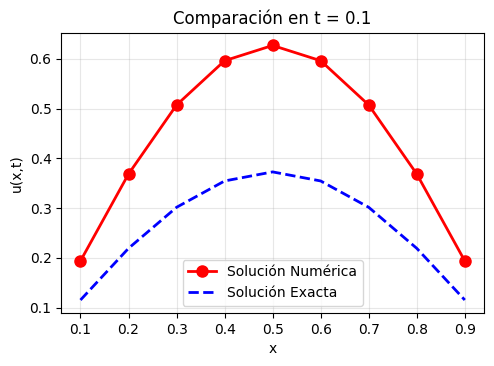

In [267]:
# Puntos en x
x_puntos = np.linspace(0.1, 0.9, 9)

# Calcular solución exacta en los mismos puntos
solucion_exacta_t = solucion_exacta(x_puntos, t_valor)

# Graficar comparación
plt.figure(figsize=(12, 8))

# Subplot 1: Comparación directa
plt.subplot(2, 2, 1)
plt.plot(x_puntos, solucion_numerica_t, 'ro-', linewidth=2, markersize=8, label='Solución Numérica')
plt.plot(x_puntos, solucion_exacta_t, 'b--', linewidth=2, label='Solución Exacta')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title(f'Comparación en t = {t_valor}')
plt.legend()
plt.grid(True, alpha=0.3)

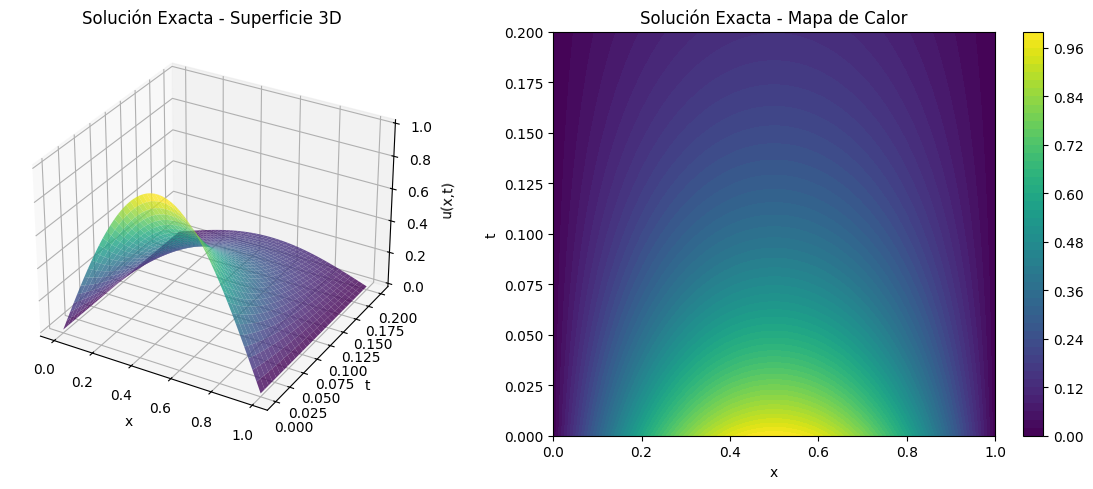

In [268]:
# Gráfica 3D de la solución exacta
fig = plt.figure(figsize=(12, 5))

# Subplot 1: Superficie 3D exacta
ax1 = fig.add_subplot(121, projection='3d')
X, T = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 0.2, 30))
U_exacta = solucion_exacta(X, T)

surf = ax1.plot_surface(X, T, U_exacta, cmap=cm.viridis, alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('u(x,t)')
ax1.set_title('Solución Exacta - Superficie 3D')

# Subplot 2: Mapa de calor
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, T, U_exacta, levels=50, cmap=cm.viridis)
plt.colorbar(contour, ax=ax2)
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_title('Solución Exacta - Mapa de Calor')

plt.tight_layout()
plt.show()



<span style="color:magenta;">**Ejercicio 5**:¿Es necesario resolver el sistema de 9 x 9 o podemos hacer una simplificación?</span>

Si podemos simplificar usando <span style="color:red;">**Simetria**</span> debido a que en $$f(x) = sin(πx)$$ es simétrica alrededor de $x=0.5$, podemos reducir el sistema a la mita de la siqguiente forma :

**Matriz reducida a una de orden de 5×5**


A =
\begin{bmatrix}
3 & -1 & 0 & 0 & 0 \\
-1 & 3 & -1 & 0 & 0 \\
0 & -1 & 3 & -1 & 0 \\
0 & 0 & -1 & 3 & -1 \\
0 & 0 & 0 & -1 & 3
\end{bmatrix}


Obteniendo el Sistema de ecuaciones:

\begin{align*}
3u_1 - u_2 &= f(0.1) \\
-u_1 + 3u_2 - u_3 &= f(0.2) \\
-u_2 + 3u_3 - u_4 &= f(0.3) \\
-u_3 + 3u_4 - u_5 &= f(0.4) \\
-u_4 + 3u_5 &= f(0.5)
\end{align*}

*Donde:* $f(x) = \sin(\pi x)$


**Simetría en :** $u_6 = u_4,\quad u_7 = u_3,\quad u_8 = u_2,\quad u_9 = u_1$

De tal manera que el código estaría más simplificado:

```python
from scipy.sparse import diags

def crear_matriz_A_scipy(n=5):
    """Crea la matriz usando scipy (más eficiente para n grande)"""
    diagonales = [[3]*n, [-1]*(n-1), [-1]*(n-1)] #diagonal principal dada por -3
    A_sparse = diags(diagonales, [0, -1, 1], shape=(n, n))
    return sp.Matrix(A_sparse.toarray())

A1 = crear_matriz_A_scipy(5) # crea la matriz de tamaño nxn

b1 = sp.Matrix([f(i*0.1) for i in range(1, 6)]) # Para cada i en [1,2,3,4,5] calculamos i*0.1:

A1.LUsolve(b1)

def richardson(A1, b1, j):
    S = []
    b_1 = b.copy()

    for i in range(j+1):
        S.append(np.array(b_1, dtype=float).reshape(-1))  # vector fila
        sol = A.LUsolve(b_1)
        b_1 = sol

    return np.array(S)   # matriz resultado

print(S)
```

Retomando el Ejercicio completo

In [269]:
j = 20 # Número de pasos en el tiempo

In [270]:
U=richardson(A, b, j)

In [271]:
x = np.linspace(0, 1, 9) #Número de nodos internos en X
y = np.linspace(0, 0.6, j+1) #Debe coincidir con el tamaño de j por k (tiempo)
X, Y = np.meshgrid(x, y)

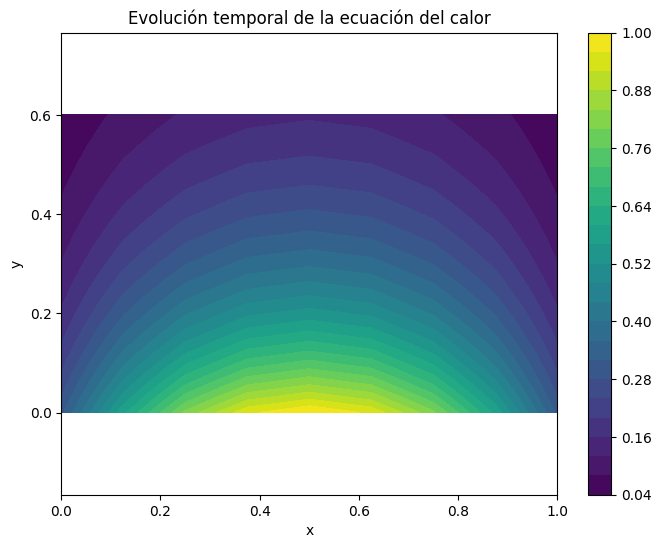

In [272]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Evolución temporal de la ecuación del calor')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

Explicar la gráfica

El mapa de colores nos indica como:

* En $t=0$ (parte inferior): se aplica la condicin en  $u(x,0) = sin(πx)$.

* A medida que sube el tiempo aumenta:En otras palabras  la temperatura decae exponencialmente.

* En $t=0.6$ (parte superior): Temperatura es casi uniforme y cercana a cero

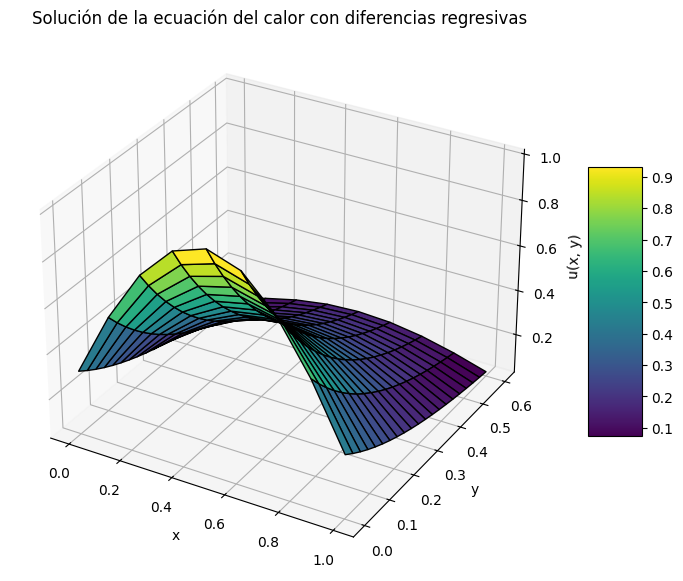

In [273]:
%matplotlib inline
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con diferencias regresivas')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Explicar la gráfica

* En $t=0$: $u(x,0) = sin(πx)$ → Se forma una onda sinusoidal
* Para t>0: Hay decaimiento exponencial $u(x,t) ≈ e^{-π²t} sin(πx)$
* En t=0.6: Valores muy cercanos a cero $e^{π²×0.6} ≈ 0.015$
Tiene una forma de  ``Colina'' que se aplana con el tiempo

**Ejercicio 6**: Hay un ligero detalle con la precisión de estas gráficas, ¿cuál?

El detalle esta en la  precisión  espacial y temporal:
1. **La Discretización Espacial es demasiado Gruesa:**

'''
x = np.linspace(0, 1, 9)  # Solo 9 puntos espaciales
'''

es decir

$
\Delta x = \frac{1}{8} = 0.125 \quad \text{(lo cual es muy grande!)}
$

* La función $\sin(\pi x)$ necesita más puntos para representarse bien
* Con solo 9 puntos, se pierde la suavidad del seno
* La solución aparece "escalonada" en lugar de suave
Al igual que la Escala temporal es incorrecta (0.6 en lugar de 0.2)


podriamos cambiarlo a esta manera

#### Para tener una mejor discretización
x = np.linspace(0, 1, 51)    # 51 puntos (Δx = 0.02)

t = np.linspace(0, 0.2, 21)  # tmax = 0.2, coherente con k=0.01
